In [132]:
import warnings
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
warnings.filterwarnings("ignore")
pd.options.display.max_colwidth = 1000
pd.options.display.max_rows = 2000
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
df = pd.read_csv("general_dataset.csv", sep=',')

In [4]:
counter = 0
for i in range(df.shape[0]):
    if type(df.loc[i, 'Headline']) is float:
        counter += 1
        df.loc[i, 'Headline'] = 'No headline'
print(counter)

3


In [5]:
counter = 0
for i in range(df.shape[0]):
    if type(df.loc[i, 'Ticker']) is float:
        counter += 1
        df.loc[i, 'Ticker'] = 'No text'
print(counter)

3530


In [144]:
def plot_clusters(X, y):
    if y is not None:
        for cluster_label in np.unique(y):
            plt.scatter(X[y == cluster_label, 0],
                        X[y == cluster_label, 1],
                        label=str(cluster_label))
    else:
        plt.scatter(X[:, 0], X[:, 1], label='samples')

    plt.xlabel('X1', size=12)
    plt.ylabel('X2', size=12)
    plt.title('Clustering result')
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.savefig('clustering_result.png')
    plt.show()

In [163]:
def calculate_metric(X, y_pred, k_means, n_clusters):
    sum_of_distances = 0
    for object in range(X.shape[0]):
        distance = np.sum(np.square(X[object, :] - k_means.cluster_centers_[y_pred[object]]))
        sum_of_distances += distance
    return sum_of_distances / X.shape[0]

In [8]:
!pip install -U sentence-transformers


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
df = df[df['Data source']=='Financial news'].reset_index()
df.shape

(221513, 7)

In [28]:
from sentence_transformers import SentenceTransformer
print(df['Headline'].shape)
sentences = df['Headline']
print(sentences)

(221513,)
0         GM to respond by January 7 to Canada union proposals to save Ontario plant
1                                              Wells Fargo plans 1 000 U S  job cuts
2                  General Electric Shares Jump Despite Lower Than Expected Earnings
3                         ManpowerGroup Collaborates With Rockwell To Train Veterans
4                 11 Reasons Why U S  Economic Growth Is The Worst That It Has Been 
                                             ...                                    
221508                     Chevron  CVX  Set To Report Q2 Earnings  What To Expect  
221509                             Cree  CREE  Shares March Higher  Can It Continue 
221510                                                    Nasdaq sets closing record
221511                       Seagate  STX  Hits New 52 week Low On Dismal Q4 Results
221512                  Fifth Third  FITB  Beats Q2 Earnings Estimates  Revenues Lag
Name: Headline, Length: 221513, dtype: object


In [29]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [30]:
embeddings = model.encode(sentences, show_progress_bar=True)
print(embeddings)

Batches:   0%|          | 0/6923 [00:00<?, ?it/s]

[[-0.03238638  0.02160685  0.09154774 ... -0.04127031  0.01551469
  -0.02241864]
 [-0.07827442 -0.06315102  0.09344064 ... -0.1178342   0.03013344
  -0.00788978]
 [-0.03268478  0.00823788  0.12671539 ... -0.1464237  -0.1357771
   0.0605911 ]
 ...
 [ 0.03678172 -0.06311868  0.00747726 ... -0.0585306  -0.07963564
   0.03511065]
 [ 0.01418586  0.00581843  0.06786217 ... -0.11480729 -0.09547006
   0.07193917]
 [-0.02134173 -0.08517821 -0.00218906 ... -0.12244923  0.03435688
   0.04939972]]


In [138]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

distance_metrics = []
number_of_components = []
for n_components in range(2, 384, 10):
    tsne = PCA(n_components=n_components, random_state=42)
    X_tsne = tsne.fit_transform(embeddings)
    k_means_clustering = KMeans(n_clusters=20)
    k_means_clustering.fit(X_tsne)
    y_pred = k_means_clustering.predict(X_tsne)
    distance = metrics.silhouette_score(X_tsne, k_means_clustering.labels_, sample_size=1000)
    distance_metrics.append(distance)
    number_of_components.append(n_components)
    print(n_components)

2
12
22
32
42
52
62
72
82
92
102
112
122
132
142
152
162
172
182
192
202
212
222
232
242
252
262
272
282
292
302
312
322
332
342
352
362
372
382


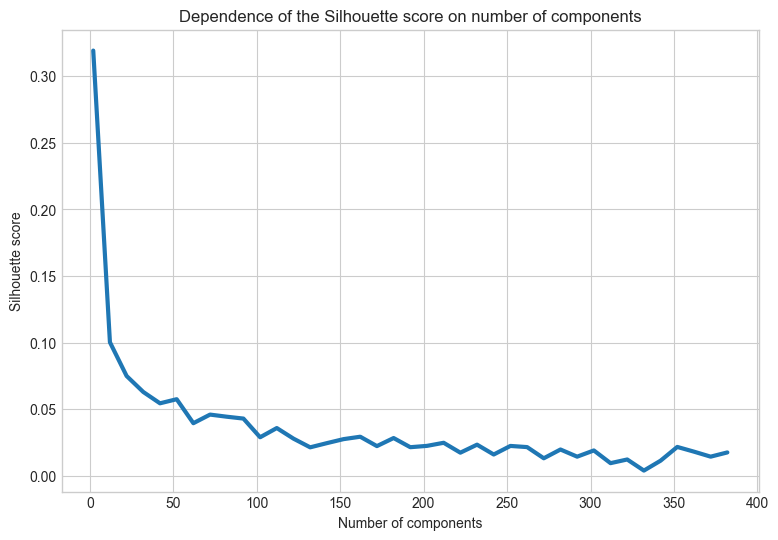

In [140]:
plt.figure(figsize=(9, 6))
plt.plot(number_of_components, distance_metrics, linewidth=3)
plt.title('Dependence of the Silhouette score on number of components')
plt.xlabel('Number of components')
plt.ylabel('Silhouette score')
plt.savefig('number_of_components_silhouette.png')

In [166]:
pca= PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(embeddings)
distance_metrics = []
number_of_clusters = []
for n_clusters in range(2, 51, 2):
    k_means_clustering = KMeans(n_clusters=n_clusters)
    k_means_clustering.fit(X_pca)
    y_pred = k_means_clustering.predict(X_pca)
    distance = calculate_metric(X_pca, y_pred, k_means_clustering, n_clusters)
    distance_metrics.append(distance)
    number_of_clusters.append(n_clusters)
    print(n_clusters)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50


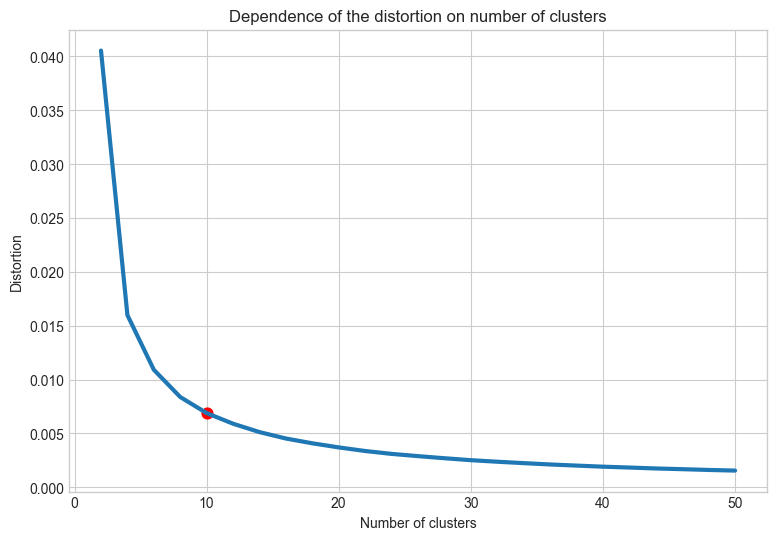

In [168]:
plt.figure(figsize=(9, 6))
plt.plot(number_of_clusters, distance_metrics, linewidth=3)
plt.title('Dependence of the distortion on number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.scatter(10, distance_metrics[4], color='red', s=60, marker='o')
plt.savefig('distortion')

In [170]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=10)
y_pred_all = model.fit_predict(X_pca)

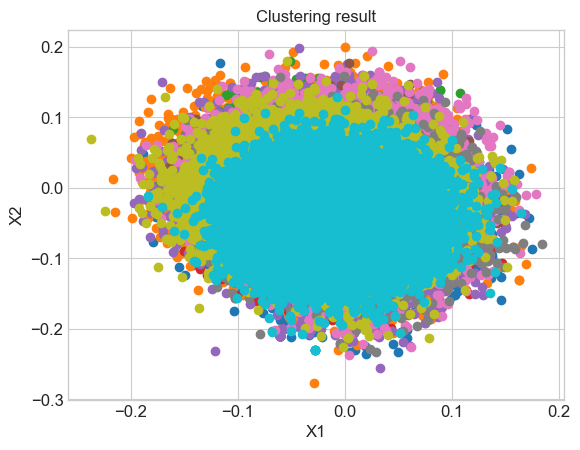

<Figure size 640x480 with 0 Axes>

In [171]:
plot_clusters(embeddings, y_pred_all)

In [96]:
distance = calculate_metric(X_tsne, y_pred_all, model, 20)
print(distance)

40.93937399081633


10
10010
20010
30010
40010
50010
60010
70010
80010
90010
100010
110010
120010
130010
140010
150010
160010
170010
180010
190010


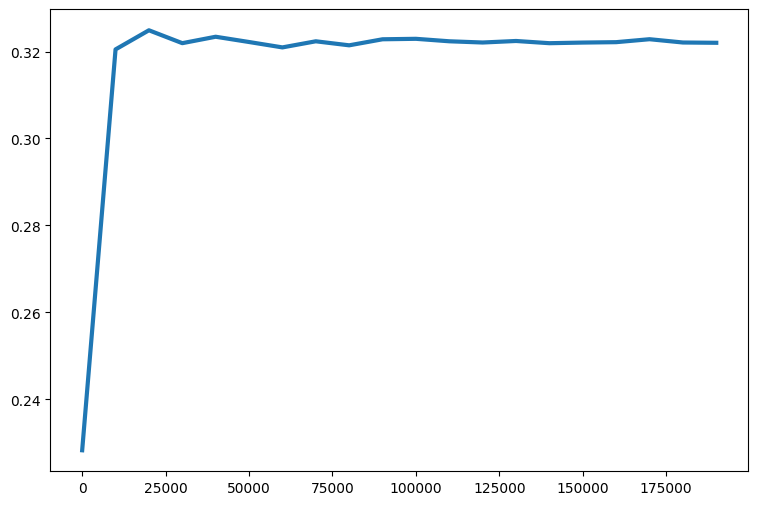

In [117]:
from sklearn import metrics

silhouette_metrics = []
sample_sizes = []
for sample_size in range(10, 200000, 10000):
    metric = metrics.silhouette_score(X_tsne, model.labels_, sample_size=sample_size)
    silhouette_metrics.append(metric)
    sample_sizes.append(sample_size)
    print(sample_size)

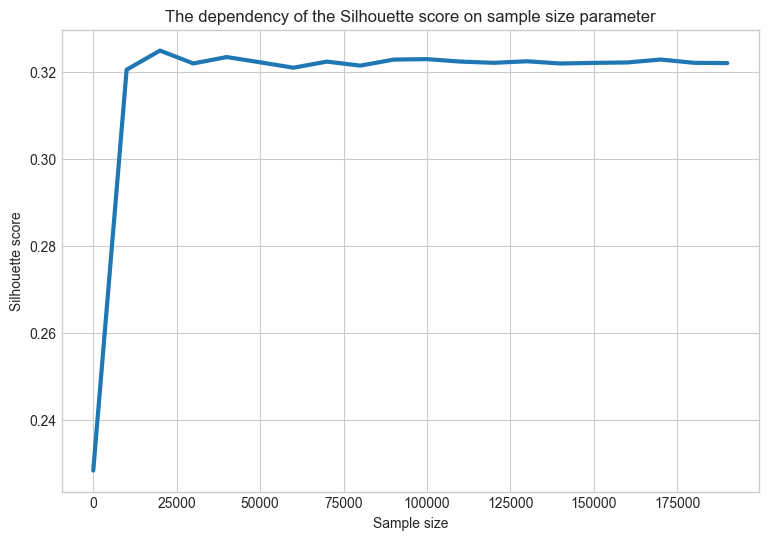

In [151]:
plt.figure(figsize=(9, 6))
plt.xlabel('Sample size')
plt.ylabel('Silhouette score')
plt.title('The dependency of the Silhouette score on sample size parameter')
plt.plot(sample_sizes, silhouette_metrics, linewidth=3)
plt.savefig('sample_sizes')

In [178]:
metrics.silhouette_score(X_pca, model.labels_, sample_size=50000)

0.34057847